In [1]:
import argparse
import easydict

from utils.config import *
from utils.count_model import *
from agents import *
from torchsummaryX import summary


In [2]:
config = easydict.EasyDict()
config.exp_name = "vgg16_exp_cifar100_0"
config.log_dir = os.path.join("experiments", config.exp_name, "logs/")

config.load_file = os.path.join("experiments", "vgg16_exp_cifar100_0","checkpoints", "checkpoint.pth")
config.cuda = True
config.gpu_device = 0
config.seed = 1
config.milestones = [5, 10,15]
config.gamma = 0.9
config.img_size = 32
config.num_classes = 100
config.data_mode = "download"
config.data_loader_workers = 4
config.pin_memory = True
config.async_loading = True
config.batch_size = 128
config.async_loading = True
config.max_epoch = 100
torch.cuda.init()

agent = globals()["VGG_BN_cifar"](config)
agent.init_graph()
agent.load_checkpoint(config.load_file)
agent.compress(method = 'greedy',k=0.62)
summary(agent.model, torch.zeros((1, 3, 32, 32)).to(torch.device("cuda")))
best,history = agent.train(specializing=False, freeze_conv=False)


print(count_model_param_nums(agent.model) / 1e6)
print(count_model_flops(agent.model, input_res=32)/ 1e9)


Files already downloaded and verified
num_pruned 25
indices_pruned !!!  [10, 11, 16, 20, 24, 25, 26, 27, 31, 32, 41, 43, 49, 58, 60, 42, 22, 13, 8, 33, 23, 63, 14, 61, 59]
num_pruned 25
indices_pruned !!!  [11, 55, 48, 14, 19, 24, 44, 18, 21, 50, 13, 1, 23, 39, 53, 60, 28, 2, 7, 0, 16, 27, 42, 33, 43]
num_pruned 49
indices_pruned !!!  [116, 1, 73, 7, 127, 74, 101, 23, 99, 105, 97, 57, 84, 100, 75, 47, 56, 69, 33, 42, 109, 113, 71, 25, 32, 120, 103, 59, 12, 9, 4, 16, 22, 18, 3, 60, 61, 62, 38, 65, 79, 14, 85, 111, 95, 10, 40, 36, 76]
num_pruned 49
indices_pruned !!!  [113, 1, 33, 125, 27, 88, 81, 82, 43, 15, 8, 101, 73, 53, 118, 0, 97, 32, 122, 89, 98, 93, 6, 28, 110, 13, 92, 90, 126, 75, 117, 83, 54, 30, 41, 56, 44, 23, 67, 66, 24, 103, 31, 20, 35, 114, 112, 115, 78]
num_pruned 98
indices_pruned !!!  [137, 122, 18, 201, 221, 187, 176, 166, 2, 54, 101, 224, 111, 199, 180, 78, 151, 6, 12, 220, 154, 4, 142, 89, 110, 86, 50, 66, 198, 44, 178, 115, 228, 49, 69, 13, 131, 21, 26, 241, 191, 14

Epoch-0-:   0%|                                                                                | 0/391 [00:00<?, ?it/s]

                                Kernel Shape     Output Shape      Params  \
Layer                                                                       
0_features.Conv2d_0            [3, 39, 3, 3]  [1, 39, 32, 32]      1.092k   
1_features.BatchNorm2d_1                [39]  [1, 39, 32, 32]        78.0   
2_features.ReLU_2                          -  [1, 39, 32, 32]           -   
3_features.Conv2d_3           [39, 39, 3, 3]  [1, 39, 32, 32]     13.728k   
4_features.BatchNorm2d_4                [39]  [1, 39, 32, 32]        78.0   
5_features.ReLU_5                          -  [1, 39, 32, 32]           -   
6_features.MaxPool2d_6                     -  [1, 39, 16, 16]           -   
7_features.Conv2d_7           [39, 79, 3, 3]  [1, 79, 16, 16]     27.808k   
8_features.BatchNorm2d_8                [79]  [1, 79, 16, 16]       158.0   
9_features.ReLU_9                          -  [1, 79, 16, 16]           -   
10_features.Conv2d_10         [79, 79, 3, 3]  [1, 79, 16, 16]     56.248k   

Epoch-0-:   1%|▋                                                                       | 4/391 [00:05<26:33,  4.12s/it]

current learning rate:0.0


Valiation at -0-:   0%|                                                                         | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 1.8806247823988385	Top1 Acc: 0.52214


Valiation at -0-: 100%|████████████████████████████████████████████████████████████████| 79/79 [00:03<00:00, 19.98it/s]
C:\Users\USER001\miniconda3\envs\pytorch16\lib\site-packages\torch\optim\lr_scheduler.py:143: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)
Epoch-1-:   0%|                                                                                | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 2.002688981309722	Top1 Acc: 0.4934


Epoch-1-:   1%|▉                                                                       | 5/391 [00:05<25:46,  4.01s/it]

current learning rate:0.02


Valiation at -1-:   0%|                                                                         | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 1.8161389513698685	Top1 Acc: 0.5170999999809265


Epoch-2-:   0%|                                                                                | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 2.8631582893902743	Top1 Acc: 0.359


Epoch-2-:   0%|▏                                                                       | 1/391 [00:05<38:34,  5.93s/it]

current learning rate:0.04


Valiation at -2-:   0%|                                                                         | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 1.9285849521836966	Top1 Acc: 0.4963799999904633


Epoch-3-:   0%|                                                                                | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 2.2049001696743544	Top1 Acc: 0.4494


Epoch-3-:   0%|▏                                                                       | 1/391 [00:06<39:36,  6.09s/it]

current learning rate:0.060000000000000005


Valiation at -3-:   0%|                                                                         | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 1.979868443725664	Top1 Acc: 0.48769999999046326


Epoch-4-:   0%|                                                                                | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 2.2119709766363798	Top1 Acc: 0.4323


Epoch-4-:   1%|▌                                                                       | 3/391 [00:06<28:26,  4.40s/it]

current learning rate:0.08


Valiation at -4-:   0%|                                                                         | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 2.0480148557506865	Top1 Acc: 0.47425999999046325


Epoch-5-:   0%|                                                                                | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 2.2570478750180594	Top1 Acc: 0.4381


Epoch-5-:   1%|▉                                                                       | 5/391 [00:05<26:06,  4.06s/it]

current learning rate:0.1


Valiation at -5-:   0%|                                                                         | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 2.0368807483512117	Top1 Acc: 0.47631999999046326


Epoch-6-:   0%|                                                                                | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 2.723619367502913	Top1 Acc: 0.3672


Epoch-6-:   1%|▉                                                                       | 5/391 [00:05<26:26,  4.11s/it]

current learning rate:0.09997266286704631


Valiation at -6-:   0%|                                                                         | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 1.9905185891539239	Top1 Acc: 0.48682


Epoch-7-:   0%|                                                                                | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 2.3443280684797068	Top1 Acc: 0.4261


Epoch-7-:   1%|▋                                                                       | 4/391 [00:06<26:36,  4.13s/it]

current learning rate:0.09989068136093873


Valiation at -7-:   0%|                                                                         | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 1.9735734981039297	Top1 Acc: 0.49023999999046325


Epoch-8-:   0%|                                                                                | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 2.0686763826804824	Top1 Acc: 0.479


Epoch-8-:   0%|▏                                                                       | 1/391 [00:05<38:12,  5.88s/it]

current learning rate:0.09975414512725057


Valiation at -8-:   0%|                                                                         | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 1.9532468291499732	Top1 Acc: 0.4960999999809265


Epoch-9-:   0%|                                                                                | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 2.2652061302450637	Top1 Acc: 0.4398


Epoch-9-:   0%|▏                                                                       | 1/391 [00:05<38:53,  5.98s/it]

current learning rate:0.09956320346634877


Valiation at -9-:   0%|                                                                         | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 1.937194448907662	Top1 Acc: 0.4993


Epoch-10-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 2.212835179099554	Top1 Acc: 0.4558


Epoch-10-:   0%|▏                                                                      | 1/391 [00:06<40:21,  6.21s/it]

current learning rate:0.09931806517013612


Valiation at -10-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 1.9182988188760666	Top1 Acc: 0.5044600000286102


Epoch-11-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 2.4607313041445575	Top1 Acc: 0.4237


Epoch-11-:   1%|▋                                                                      | 4/391 [00:06<26:56,  4.18s/it]

current learning rate:0.09901899829374047


Valiation at -11-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 1.9165185970418595	Top1 Acc: 0.5032600000095367


Epoch-12-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 2.139437393297123	Top1 Acc: 0.467


Epoch-12-:   1%|▋                                                                      | 4/391 [00:06<27:02,  4.19s/it]

current learning rate:0.0986663298624003


Valiation at -12-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 1.910613843547109	Top1 Acc: 0.5061399999809265


Epoch-13-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 2.3950224420692345	Top1 Acc: 0.424


Epoch-13-:   1%|▋                                                                      | 4/391 [00:06<26:59,  4.18s/it]

current learning rate:0.09826044551386744


Valiation at -13-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 1.9081843951169182	Top1 Acc: 0.5054800000286103


Epoch-14-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 2.054766443711293	Top1 Acc: 0.4832


Epoch-14-:   1%|▌                                                                      | 3/391 [00:06<27:08,  4.20s/it]

current learning rate:0.09780178907671788


Valiation at -14-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 1.9096641933826535	Top1 Acc: 0.5063000000095368


Epoch-15-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 2.361050500145441	Top1 Acc: 0.4248


Epoch-15-:   1%|▌                                                                      | 3/391 [00:06<28:09,  4.35s/it]

current learning rate:0.09729086208503174


Valiation at -15-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 1.890037693635887	Top1 Acc: 0.5104000000190735


Epoch-16-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 2.1313495092754122	Top1 Acc: 0.4655


Epoch-16-:   1%|▌                                                                      | 3/391 [00:06<27:34,  4.26s/it]

current learning rate:0.09672822322997304


Valiation at -16-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 1.886038019529084	Top1 Acc: 0.5133800000095368


Epoch-17-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 2.0730377299876155	Top1 Acc: 0.4743


Epoch-17-:   1%|▉                                                                      | 5/391 [00:06<27:21,  4.25s/it]

current learning rate:0.09611448774886924


Valiation at -17-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 1.880066067666349	Top1 Acc: 0.5149399999904632


Epoch-18-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 2.0648819268504277	Top1 Acc: 0.4787


Epoch-18-:   1%|▉                                                                      | 5/391 [00:05<26:03,  4.05s/it]

current learning rate:0.09545032675245813


Valiation at -18-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 1.8801417908705105	Top1 Acc: 0.5119000000190734


Epoch-19-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 2.0025985286205628	Top1 Acc: 0.4924


Epoch-19-:   1%|▋                                                                      | 4/391 [00:05<26:37,  4.13s/it]

current learning rate:0.09473646649103817


Valiation at -19-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 1.8668244946033448	Top1 Acc: 0.5171000000286102


Epoch-20-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 2.0574382649192327	Top1 Acc: 0.4822


Epoch-20-:   1%|▌                                                                      | 3/391 [00:05<25:46,  3.99s/it]

current learning rate:0.09397368756032445


Valiation at -20-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 1.8612616327412599	Top1 Acc: 0.5192999999809265


Epoch-21-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.998764901221553	Top1 Acc: 0.4868


Epoch-21-:   0%|▏                                                                      | 1/391 [00:05<38:50,  5.98s/it]

current learning rate:0.09316282404787869


Valiation at -21-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 1.8519048721284208	Top1 Acc: 0.5194600000572205


Epoch-22-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 2.520816229566743	Top1 Acc: 0.422


Epoch-22-:   1%|▋                                                                      | 4/391 [00:05<25:37,  3.97s/it]

current learning rate:0.09230476262104677


Valiation at -22-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 1.842935075845255	Top1 Acc: 0.5220599999809266


Epoch-23-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 2.179621436927892	Top1 Acc: 0.4666


Epoch-23-:   1%|▋                                                                      | 4/391 [00:05<25:40,  3.98s/it]

current learning rate:0.09140044155740101


Valiation at -23-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 1.8420559244082713	Top1 Acc: 0.5240600000572204


Epoch-24-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.9539546196973776	Top1 Acc: 0.5102


Epoch-24-:   1%|▉                                                                      | 5/391 [00:05<24:47,  3.85s/it]

current learning rate:0.09045084971874738


Valiation at -24-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 1.8261930174230006	Top1 Acc: 0.5263800000190735


Epoch-25-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 2.1378999586346783	Top1 Acc: 0.4737


Epoch-25-:   1%|▉                                                                      | 5/391 [00:05<24:32,  3.82s/it]

current learning rate:0.08945702546981969


Valiation at -25-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 1.8205469355863684	Top1 Acc: 0.5299599999904633


Epoch-26-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 2.2171237227282945	Top1 Acc: 0.4462


Epoch-26-:   1%|▉                                                                      | 5/391 [00:05<24:39,  3.83s/it]

current learning rate:0.08842005554284296


Valiation at -26-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 1.8114378430959208	Top1 Acc: 0.5280400000572204


Epoch-27-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 2.3794672730602797	Top1 Acc: 0.4478


Epoch-27-:   1%|▉                                                                      | 5/391 [00:05<25:04,  3.90s/it]

current learning rate:0.0873410738492077


Valiation at -27-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 1.7925487726240816	Top1 Acc: 0.5333000000286102


Epoch-28-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.9427639396884773	Top1 Acc: 0.5022


Epoch-28-:   1%|▉                                                                      | 5/391 [00:05<24:54,  3.87s/it]

current learning rate:0.08622126023955445


Valiation at -28-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 1.794022882990825	Top1 Acc: 0.5335000000572204


Epoch-29-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 2.020355625997616	Top1 Acc: 0.4894


Epoch-29-:   1%|▉                                                                      | 5/391 [00:05<24:59,  3.89s/it]

current learning rate:0.08506183921362444


Valiation at -29-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 1.7712974161138315	Top1 Acc: 0.53694


Epoch-30-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.9128671990165227	Top1 Acc: 0.51


Epoch-30-:   1%|▉                                                                      | 5/391 [00:05<25:13,  3.92s/it]

current learning rate:0.08386407858128707


Valiation at -30-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 1.7755575862991841	Top1 Acc: 0.5367400000572204


Epoch-31-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.994436433043661	Top1 Acc: 0.4984


Epoch-31-:   1%|▋                                                                      | 4/391 [00:05<25:26,  3.94s/it]

current learning rate:0.08262928807620844


Valiation at -31-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 1.748808010459861	Top1 Acc: 0.545000000038147


Epoch-32-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.9430680984183202	Top1 Acc: 0.502


Epoch-32-:   1%|▉                                                                      | 5/391 [00:05<25:07,  3.91s/it]

current learning rate:0.08135881792367686


Valiation at -32-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 1.7445731656935515	Top1 Acc: 0.54524


Epoch-33-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 2.0474378127086013	Top1 Acc: 0.4871


Epoch-33-:   1%|▉                                                                      | 5/391 [00:05<24:53,  3.87s/it]

current learning rate:0.08005405736415126


Valiation at -33-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 1.725160687475863	Top1 Acc: 0.54902


Epoch-34-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.983351911170573	Top1 Acc: 0.5013


Epoch-34-:   1%|▋                                                                      | 4/391 [00:05<25:13,  3.91s/it]

current learning rate:0.07871643313414718


Valiation at -34-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 1.7212989052848133	Top1 Acc: 0.5488400000190735


Epoch-35-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.890798378594314	Top1 Acc: 0.5217


Epoch-35-:   1%|▋                                                                      | 4/391 [00:05<25:04,  3.89s/it]

current learning rate:0.07734740790612135


Valiation at -35-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 1.7016300990453461	Top1 Acc: 0.5538799999809265


Epoch-36-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.9031748394422894	Top1 Acc: 0.5099


Epoch-36-:   0%|▏                                                                      | 1/391 [00:05<36:08,  5.56s/it]

current learning rate:0.07594847868906077


Valiation at -36-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 1.6889804906552406	Top1 Acc: 0.55638


Epoch-37-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.8272714750676216	Top1 Acc: 0.5286


Epoch-37-:   1%|▋                                                                      | 4/391 [00:05<25:33,  3.96s/it]

current learning rate:0.0745211751915254


Valiation at -37-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 1.6777914552127613	Top1 Acc: 0.5603800000572204


Epoch-38-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 2.0844742557670495	Top1 Acc: 0.4796


Epoch-38-:   1%|▋                                                                      | 4/391 [00:05<25:04,  3.89s/it]

current learning rate:0.0730670581489344


Valiation at -38-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 1.6673690781873816	Top1 Acc: 0.559360000038147


Epoch-39-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.858495009096363	Top1 Acc: 0.523


Epoch-39-:   1%|▉                                                                      | 5/391 [00:05<25:24,  3.95s/it]

current learning rate:0.07158771761692465


Valiation at -39-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 1.6511365251467967	Top1 Acc: 0.5655000000381469


Epoch-40-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.7950608866124214	Top1 Acc: 0.5454


Epoch-40-:   1%|▋                                                                      | 4/391 [00:05<25:24,  3.94s/it]

current learning rate:0.07008477123264849


Valiation at -40-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 1.6329492547018143	Top1 Acc: 0.571180000038147


Epoch-41-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.9419810032542748	Top1 Acc: 0.5125


Epoch-41-:   1%|▋                                                                      | 4/391 [00:05<24:42,  3.83s/it]

current learning rate:0.06855986244591104


Valiation at -41-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 1.6183112457280269	Top1 Acc: 0.5744200000190735


Epoch-42-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.7844368792787384	Top1 Acc: 0.5327


Epoch-42-:   1%|▉                                                                      | 5/391 [00:05<24:57,  3.88s/it]

current learning rate:0.06701465872208216


Valiation at -42-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 1.5913527792372058	Top1 Acc: 0.5798600000190735


Epoch-43-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.722514123856267	Top1 Acc: 0.5571


Epoch-43-:   1%|▋                                                                      | 4/391 [00:05<25:00,  3.88s/it]

current learning rate:0.06545084971874737


Valiation at -43-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 1.5859984595452428	Top1 Acc: 0.5805400000190735


Epoch-44-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 2.250904489167129	Top1 Acc: 0.4767


Epoch-44-:   1%|▋                                                                      | 4/391 [00:05<24:59,  3.88s/it]

current learning rate:0.06387014543809225


Valiation at -44-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 1.574046567272957	Top1 Acc: 0.581720000038147


Epoch-45-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.8075628476806833	Top1 Acc: 0.5421


Epoch-45-:   1%|▋                                                                      | 4/391 [00:05<25:47,  4.00s/it]

current learning rate:0.062274274357039965


Valiation at -45-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 1.5420319784022962	Top1 Acc: 0.5899200000190735


Epoch-46-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.782670743857758	Top1 Acc: 0.5404


Epoch-46-:   1%|▉                                                                      | 5/391 [00:05<25:26,  3.95s/it]

current learning rate:0.06066498153718736


Valiation at -46-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 1.5246418757206948	Top1 Acc: 0.5943199999809265


Epoch-47-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.8906865874423255	Top1 Acc: 0.5219


Epoch-47-:   1%|▉                                                                      | 5/391 [00:05<24:54,  3.87s/it]

current learning rate:0.0590440267166055


Valiation at -47-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 1.5168627104186037	Top1 Acc: 0.59718


Epoch-48-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.7925787047494817	Top1 Acc: 0.5342


Epoch-48-:   1%|▋                                                                      | 4/391 [00:05<24:40,  3.82s/it]

current learning rate:0.0574131823855921


Valiation at -48-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 1.4851997435245368	Top1 Acc: 0.603640000038147


Epoch-49-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.6415729839590532	Top1 Acc: 0.5723


Epoch-49-:   1%|▉                                                                      | 5/391 [00:05<24:44,  3.85s/it]

current learning rate:0.05577423184847931


Valiation at -49-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 1.467140986181586	Top1 Acc: 0.60792


Epoch-50-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.6446881233891355	Top1 Acc: 0.5797


Epoch-50-:   1%|▉                                                                      | 5/391 [00:05<24:25,  3.80s/it]

current learning rate:0.05412896727361663


Valiation at -50-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 1.455617347336791	Top1 Acc: 0.610640000038147


Epoch-51-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.73886207538315	Top1 Acc: 0.5636


Epoch-51-:   1%|▋                                                                      | 4/391 [00:05<25:31,  3.96s/it]

current learning rate:0.052479187733661115


Valiation at -51-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 1.4367429106436727	Top1 Acc: 0.61328


Epoch-52-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.6897336003146595	Top1 Acc: 0.5645


Epoch-52-:   1%|▋                                                                      | 4/391 [00:05<24:47,  3.84s/it]

current learning rate:0.05082669723831793


Valiation at -52-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 1.4096836153503574	Top1 Acc: 0.62216


Epoch-53-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.604008081593091	Top1 Acc: 0.5817


Epoch-53-:   1%|▉                                                                      | 5/391 [00:05<24:51,  3.86s/it]

current learning rate:0.04917330276168208


Valiation at -53-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 1.394931088780503	Top1 Acc: 0.6265000000190735


Epoch-54-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.663891929614393	Top1 Acc: 0.5668


Epoch-54-:   1%|▋                                                                      | 4/391 [00:05<24:50,  3.85s/it]

current learning rate:0.04752081226633889


Valiation at -54-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 1.366510963500918	Top1 Acc: 0.63172


Epoch-55-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.7068986968149114	Top1 Acc: 0.5698


Epoch-55-:   1%|▉                                                                      | 5/391 [00:05<24:50,  3.86s/it]

current learning rate:0.04587103272638339


Valiation at -55-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 1.347494185885505	Top1 Acc: 0.6368399999809266


Epoch-56-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.5764992765233488	Top1 Acc: 0.5891


Epoch-56-:   1%|▉                                                                      | 5/391 [00:05<24:42,  3.84s/it]

current learning rate:0.04422576815152071


Valiation at -56-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 1.3262653645042264	Top1 Acc: 0.6404000000572204


Epoch-57-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.5634506940841675	Top1 Acc: 0.5905


Epoch-57-:   1%|▋                                                                      | 4/391 [00:05<25:01,  3.88s/it]

current learning rate:0.04258681761440791


Valiation at -57-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 1.3008353403767052	Top1 Acc: 0.646240000038147


Epoch-58-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.6064541702029072	Top1 Acc: 0.5853


Epoch-58-:   1%|▋                                                                      | 4/391 [00:05<24:57,  3.87s/it]

current learning rate:0.04095597328339452


Valiation at -58-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 1.288074737009795	Top1 Acc: 0.6493000000381469


Epoch-59-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.5918060118639017	Top1 Acc: 0.5883


Epoch-59-:   1%|▉                                                                      | 5/391 [00:05<25:09,  3.91s/it]

current learning rate:0.03933501846281267


Valiation at -59-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 1.2567329144538821	Top1 Acc: 0.6566000000572204


Epoch-60-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.5748242486881305	Top1 Acc: 0.5915


Epoch-60-:   1%|▋                                                                      | 4/391 [00:05<25:23,  3.94s/it]

current learning rate:0.03772572564296005


Valiation at -60-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 1.2294485373875064	Top1 Acc: 0.6599600000381469


Epoch-61-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.6293247757078726	Top1 Acc: 0.5871


Epoch-61-:   1%|▉                                                                      | 5/391 [00:05<25:15,  3.93s/it]

current learning rate:0.03612985456190777


Valiation at -61-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 1.2029735607564296	Top1 Acc: 0.6700400000572204


Epoch-62-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.4742137963258768	Top1 Acc: 0.6116


Epoch-62-:   1%|▉                                                                      | 5/391 [00:05<24:36,  3.83s/it]

current learning rate:0.034549150281252626


Valiation at -62-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 1.179189612341049	Top1 Acc: 0.67578


Epoch-63-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.6776790875422805	Top1 Acc: 0.5837


Epoch-63-:   1%|▉                                                                      | 5/391 [00:05<24:46,  3.85s/it]

current learning rate:0.03298534127791786


Valiation at -63-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 1.1548843339581014	Top1 Acc: 0.6800399999809266


Epoch-64-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.468461975266662	Top1 Acc: 0.6133


Epoch-64-:   1%|▉                                                                      | 5/391 [00:05<25:14,  3.92s/it]

current learning rate:0.03144013755408897


Valiation at -64-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 1.1229291011000533	Top1 Acc: 0.6877799999809265


Epoch-65-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.5361744074881831	Top1 Acc: 0.6077


Epoch-65-:   1%|▋                                                                      | 4/391 [00:05<24:49,  3.85s/it]

current learning rate:0.02991522876735153


Valiation at -65-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 1.1010141866591276	Top1 Acc: 0.69394


Epoch-66-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.3692578877074808	Top1 Acc: 0.6387


Epoch-66-:   1%|▋                                                                      | 4/391 [00:05<25:00,  3.88s/it]

current learning rate:0.02841228238307534


Valiation at -66-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 1.0583733596155405	Top1 Acc: 0.7045999999809265


Epoch-67-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.405798483498489	Top1 Acc: 0.6337


Epoch-67-:   1%|▉                                                                      | 5/391 [00:05<25:00,  3.89s/it]

current learning rate:0.02693294185106562


Valiation at -67-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 1.029284016403091	Top1 Acc: 0.7108000000572204


Epoch-68-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.55340413504009	Top1 Acc: 0.6114


Epoch-68-:   1%|▋                                                                      | 4/391 [00:05<25:09,  3.90s/it]

current learning rate:0.025478824808474593


Valiation at -68-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 1.003658113577177	Top1 Acc: 0.7184200000572205


Epoch-69-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.3959510115128528	Top1 Acc: 0.6362


Epoch-69-:   1%|▋                                                                      | 4/391 [00:05<25:02,  3.88s/it]

current learning rate:0.02405152131093924


Valiation at -69-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.9725585864937824	Top1 Acc: 0.7252400000572204


Epoch-70-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.4598543508143365	Top1 Acc: 0.6336


Epoch-70-:   1%|▋                                                                      | 4/391 [00:05<25:05,  3.89s/it]

current learning rate:0.02265259209387865


Valiation at -70-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.9420122900582335	Top1 Acc: 0.7339


Epoch-71-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.4159904673129697	Top1 Acc: 0.6383


Epoch-71-:   1%|▋                                                                      | 4/391 [00:05<26:19,  4.08s/it]

current learning rate:0.021283566865852824


Valiation at -71-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.9115929908459753	Top1 Acc: 0.7420200000190735


Epoch-72-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.40478808970391	Top1 Acc: 0.6406


Epoch-72-:   1%|▋                                                                      | 4/391 [00:05<25:22,  3.93s/it]

current learning rate:0.019945942635848746


Valiation at -72-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.884965769241533	Top1 Acc: 0.74774


Epoch-73-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.3490180825885338	Top1 Acc: 0.6466


Epoch-73-:   1%|▋                                                                      | 4/391 [00:05<25:33,  3.96s/it]

current learning rate:0.01864118207632315


Valiation at -73-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.8410221198025871	Top1 Acc: 0.75848


Epoch-74-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.3097735409495197	Top1 Acc: 0.6592


Epoch-74-:   1%|▉                                                                      | 5/391 [00:05<25:19,  3.94s/it]

current learning rate:0.017370711923791565


Valiation at -74-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.8085019229470617	Top1 Acc: 0.7692599999809265


Epoch-75-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.3900030277952362	Top1 Acc: 0.6469


Epoch-75-:   1%|▋                                                                      | 4/391 [00:05<25:30,  3.96s/it]

current learning rate:0.016135921418712958


Valiation at -75-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.7741645606582427	Top1 Acc: 0.7757000000572205


Epoch-76-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.3124227372905877	Top1 Acc: 0.6662


Epoch-76-:   1%|▉                                                                      | 5/391 [00:05<25:13,  3.92s/it]

current learning rate:0.014938160786375571


Valiation at -76-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.7428642170660941	Top1 Acc: 0.785820000038147


Epoch-77-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.3062925097308582	Top1 Acc: 0.6695


Epoch-77-:   1%|▉                                                                      | 5/391 [00:05<25:04,  3.90s/it]

current learning rate:0.013778739760445552


Valiation at -77-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.7055287758255249	Top1 Acc: 0.7945


Epoch-78-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.326138778577877	Top1 Acc: 0.6656


Epoch-78-:   1%|▉                                                                      | 5/391 [00:05<24:45,  3.85s/it]

current learning rate:0.012658926150792305


Valiation at -78-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.6665296253493375	Top1 Acc: 0.80486


Epoch-79-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.3020450910435448	Top1 Acc: 0.6736


Epoch-79-:   1%|▋                                                                      | 4/391 [00:05<25:11,  3.90s/it]

current learning rate:0.01157994445715706


Valiation at -79-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.6271217380033429	Top1 Acc: 0.8149400000572204


Epoch-80-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.2893661849106415	Top1 Acc: 0.6828


Epoch-80-:   1%|▋                                                                      | 4/391 [00:05<24:38,  3.82s/it]

current learning rate:0.010542974530180327


Valiation at -80-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.5840817186838526	Top1 Acc: 0.8257


Epoch-81-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.2989370438117016	Top1 Acc: 0.6844


Epoch-81-:   1%|▋                                                                      | 4/391 [00:05<25:11,  3.91s/it]

current learning rate:0.009549150281252633


Valiation at -81-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.5538684758536346	Top1 Acc: 0.8355600000190735


Epoch-82-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.2780670976336999	Top1 Acc: 0.6862


Epoch-82-:   1%|▋                                                                      | 4/391 [00:05<25:18,  3.92s/it]

current learning rate:0.008599558442598998


Valiation at -82-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.5085431337356567	Top1 Acc: 0.8461199999809265


Epoch-83-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.2999947470954702	Top1 Acc: 0.6871


Epoch-83-:   1%|▋                                                                      | 4/391 [00:05<24:54,  3.86s/it]

current learning rate:0.007695237378953235


Valiation at -83-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.4710279933708098	Top1 Acc: 0.8573400000572204


Epoch-84-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.3227997060063519	Top1 Acc: 0.6887


Epoch-84-:   1%|▉                                                                      | 5/391 [00:05<25:05,  3.90s/it]

current learning rate:0.006837175952121317


Valiation at -84-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.43821317925477576	Top1 Acc: 0.8655200000572204


Epoch-85-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.277360758449458	Top1 Acc: 0.7003


Epoch-85-:   1%|▉                                                                      | 5/391 [00:05<24:53,  3.87s/it]

current learning rate:0.006026312439675552


Valiation at -85-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.3934097005735578	Top1 Acc: 0.8803199999809265


Epoch-86-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.3356666595120974	Top1 Acc: 0.6947


Epoch-86-:   1%|▋                                                                      | 4/391 [00:05<25:13,  3.91s/it]

current learning rate:0.005263533508961827


Valiation at -86-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.36485526392526946	Top1 Acc: 0.8875799999809265


Epoch-87-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.3337675491465797	Top1 Acc: 0.6967


Epoch-87-:   1%|▉                                                                      | 5/391 [00:05<25:08,  3.91s/it]

current learning rate:0.004549673247541886


Valiation at -87-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.3361742078038433	Top1 Acc: 0.896500000038147


Epoch-88-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.3477688394015348	Top1 Acc: 0.6932


Epoch-88-:   1%|▋                                                                      | 4/391 [00:05<25:07,  3.90s/it]

current learning rate:0.0038855122511307627


Valiation at -88-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.30049979328499427	Top1 Acc: 0.9076000000572204


Epoch-89-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.3579958865914163	Top1 Acc: 0.6979


Epoch-89-:   1%|▋                                                                      | 4/391 [00:05<25:13,  3.91s/it]

current learning rate:0.003271776770026952


Valiation at -89-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.2820660328430593	Top1 Acc: 0.9119999999809265


Epoch-90-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.3640351423734351	Top1 Acc: 0.7003


Epoch-90-:   1%|▋                                                                      | 4/391 [00:05<25:10,  3.90s/it]

current learning rate:0.002709137914968263


Valiation at -90-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.2546256705165824	Top1 Acc: 0.921920000038147


Epoch-91-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.3651736069329177	Top1 Acc: 0.701


Epoch-91-:   1%|▋                                                                      | 4/391 [00:05<24:30,  3.80s/it]

current learning rate:0.0021982109232821178


Valiation at -91-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.23238003747466277	Top1 Acc: 0.9275000000190735


Epoch-92-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.3758407718018641	Top1 Acc: 0.7059


Epoch-92-:   1%|▉                                                                      | 5/391 [00:05<24:39,  3.83s/it]

current learning rate:0.0017395544861325664


Valiation at -92-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.21358869342928957	Top1 Acc: 0.9333800000572204


Epoch-93-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.3927758366246767	Top1 Acc: 0.7067


Epoch-93-:   1%|▉                                                                      | 5/391 [00:05<24:29,  3.81s/it]

current learning rate:0.0013336701375997074


Valiation at -93-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.19447398520148623	Top1 Acc: 0.9384


Epoch-94-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.3866967136346842	Top1 Acc: 0.7073


Epoch-94-:   1%|▉                                                                      | 5/391 [00:05<24:30,  3.81s/it]

current learning rate:0.0009810017062595322


Valiation at -94-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.18600668242710935	Top1 Acc: 0.94282


Epoch-95-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.387703218037569	Top1 Acc: 0.7078


Epoch-95-:   1%|▉                                                                      | 5/391 [00:05<24:36,  3.83s/it]

current learning rate:0.0006819348298638839


Valiation at -95-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.17259544349463699	Top1 Acc: 0.9453599999809266


Epoch-96-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.411757482003562	Top1 Acc: 0.707


Epoch-96-:   1%|▋                                                                      | 4/391 [00:05<24:54,  3.86s/it]

current learning rate:0.0004367965336512403


Valiation at -96-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.1672985582228969	Top1 Acc: 0.94766


Epoch-97-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.4065104126930237	Top1 Acc: 0.707


Epoch-97-:   1%|▉                                                                      | 5/391 [00:05<24:38,  3.83s/it]

current learning rate:0.0002458548727494292


Valiation at -97-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.16214739780901644	Top1 Acc: 0.94834


Epoch-98-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.400205758553517	Top1 Acc: 0.707


Epoch-98-:   1%|▉                                                                      | 5/391 [00:05<24:35,  3.82s/it]

current learning rate:0.00010931863906127326


Valiation at -98-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.15881284952278027	Top1 Acc: 0.95102


Epoch-99-:   0%|                                                                               | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.4044818161409112	Top1 Acc: 0.7078


Epoch-99-:   1%|▋                                                                      | 4/391 [00:05<24:42,  3.83s/it]

current learning rate:2.7337132953697554e-05


Valiation at -99-:   0%|                                                                        | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.16203010966405845	Top1 Acc: 0.9503400000572204


Valiation at -99-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:03<00:00, 21.51it/s]

Validation results at epoch-99 | loss: 1.3949306931676744	Top1 Acc: 0.7082
  + Number of params: 25.4901M
25.490125
  + Number of FLOPs: 0.14G
0.14181288


In [4]:
best

0.7082

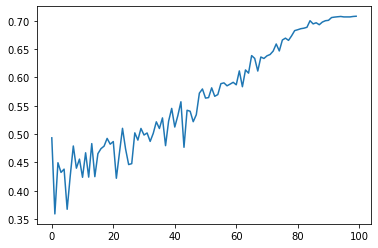

In [5]:
import matplotlib.pyplot as plt
plt.plot(history)